# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/khj9759/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

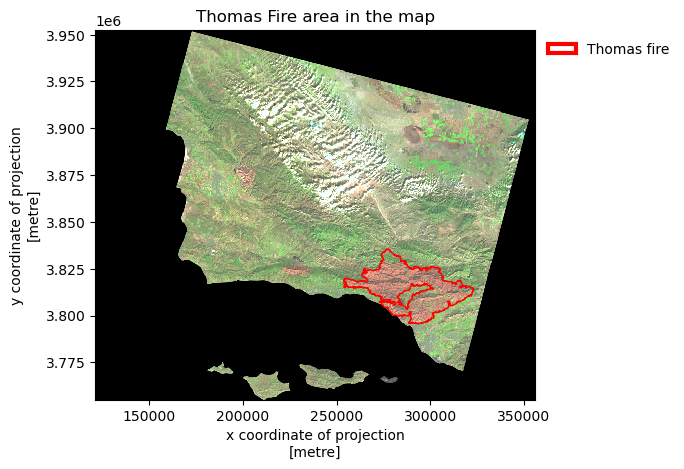

In [1]:
### ===== FINAL CODE =====
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends

import xarray as xr
import rioxarray as rioxr
import geopandas as gpd

from rasterio.features import rasterize # for rasterizing polygons


### ======= bring the data =========
pd.set_option('display.max_columns', None)

# open landsat perimeters in california
landsat = rioxr.open_rasterio('data/landsat8-2018-01-26-sb-simplified.nc')
ca_fire = gpd.read_file(os.path.join(os.getcwd(), 'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp'))


## ====== update ==========
ca_fire.columns = ca_fire.columns.str.lower()
ca_fire = ca_fire.to_crs(landsat.rio.crs)
# remove length 1 dimension (band)
landsat = landsat.squeeze()

# remove coordinates associated to band
landsat = landsat.drop('band')

# dissolve by district
fire_districts = ca_fire[['geometry','fire_name']].dissolve(by='fire_name', as_index=False)


# clipping the ca perimeter only fire 
fire_districts_clip = landsat.rio.clip_box(*fire_districts.total_bounds)

## # ======= make a map ================
# Registration areas:
#print(ca_fire.fire_name.unique())
fire_thomas = fire_districts[fire_districts.fire_name == 'THOMAS']

fig, ax = plt.subplots()

# bring the clipping map
fire_districts_clip[['swir22','nir08','red']].to_array().plot.imshow(robust = True)


# bring the fire thomas map
fire_thomas.plot(ax=ax, edgecolor='red', color='none')
# create the patch
fire_thomas_patch = mpatches.Patch(edgecolor='red', facecolor='none', linewidth=3,
                              label='Thomas fire')
 

# Adding legend with custom label colors and settings
legend = ax.legend(handles=[fire_thomas_patch], frameon=False,loc='upper left', bbox_to_anchor= (1, 1))
ax.set_title('Thomas Fire area in the map')

plt.show()


## Import libraries and functions

In [2]:
# your code here
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends

import xarray as xr
import rioxarray as rioxr
import geopandas as gpd

from rasterio.features import rasterize # for rasterizing polygons

In [3]:
pd.set_option('display.max_columns', None)

## Import data

In [4]:
# open landsat perimeters in california
landsat = rioxr.open_rasterio('data/landsat8-2018-01-26-sb-simplified.nc')
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [5]:
# open fire perimeters in california
ca_fire = gpd.read_file(os.path.join(os.getcwd(), 'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp'))
ca_fire.head()

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,14.0,1.0,1.0,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,14.0,1.0,1.0,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,14.0,6.0,1.0,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,14.0,1.0,1.0,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,14.0,6.0,1.0,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [6]:
# make column names small caps
ca_fire.columns = ca_fire.columns.str.lower()
print(ca_fire.columns, "\n")

# check CRS
print(f"california_fire: {ca_fire.crs} \nland sat: {landsat.rio.crs}\n")

# transform fishing_areas CRS to epsg:32611
ca_fire = ca_fire.to_crs(landsat.rio.crs)

print('match crs landsat and ca_fire?:', landsat.rio.crs == ca_fire.crs)

Index(['index', 'objectid', 'year_', 'state', 'agency', 'unit_id', 'fire_name',
       'inc_num', 'alarm_date', 'cont_date', 'cause', 'c_method', 'objective',
       'gis_acres', 'comments', 'complex_na', 'complex_in', 'irwinid',
       'fire_num', 'decades', 'shape_leng', 'shape_area', 'geometry'],
      dtype='object') 

california_fire: epsg:3857 
land sat: EPSG:32611

match crs landsat and ca_fire?: True


## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [7]:
# original dimensions and coordinates
print(landsat.dims, landsat.coords,'\n')

# remove length 1 dimension (band)
landsat = landsat.squeeze()
print(landsat.dims, landsat.coords,'\n')

# remove coordinates associated to band
landsat = landsat.drop('band')
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870, 'band': 1}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0 

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    band         int64 1
    spatial_ref  int64 0 

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


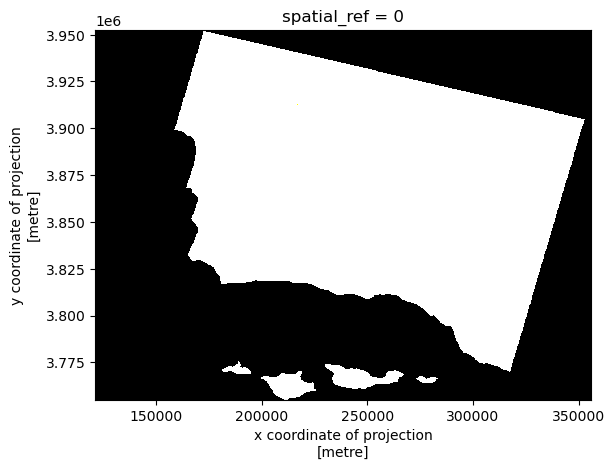

In [8]:
# map using 

landsat[['red','green','blue']].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

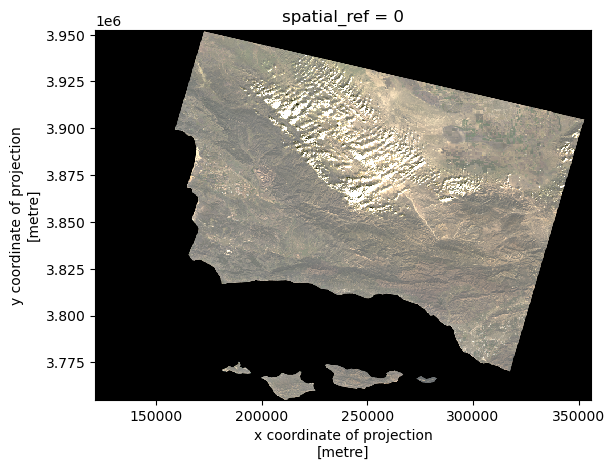

In [9]:
# your code here
landsat[['red','green','blue']].to_array().plot.imshow(robust = True)

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

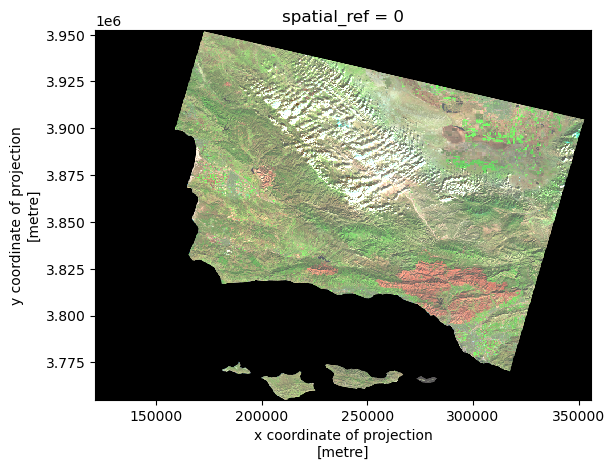

In [10]:
# your code here
landsat[['swir22','nir08','red']].to_array().plot.imshow(robust = True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [11]:
# check the two different crs 
landsat.rio.crs == ca_fire.crs

# check number of districts and rows
print(f"number of geometries: {len(ca_fire)}")
print(f"number of districts: {len(ca_fire.fire_name.unique())}")

# dissolve by district
fire_districts = ca_fire[['geometry','fire_name']].dissolve(by='fire_name', as_index=False)
fire_districts

# clipping the ca perimeter only fire 
fire_districts_clip = landsat.rio.clip_box(*fire_districts.total_bounds)

number of geometries: 608
number of districts: 521


## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

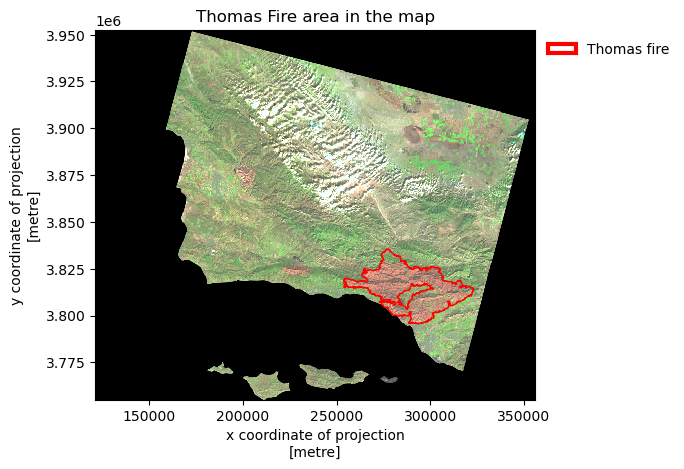

In [12]:

# Registration areas:
#print(ca_fire.fire_name.unique())
fire_thomas = fire_districts[fire_districts.fire_name == 'THOMAS']

fig, ax = plt.subplots()

# bring the clipping map
fire_districts_clip[['swir22','nir08','red']].to_array().plot.imshow(robust = True)


# bring the fire thomas map
fire_thomas.plot(ax=ax, edgecolor='red', color='none')
# create the patch
fire_thomas_patch = mpatches.Patch(edgecolor='red', facecolor='none', linewidth=3,
                              label='Thomas fire')
 

# Adding legend with custom label colors and settings
legend = ax.legend(handles=[fire_thomas_patch], frameon=False,loc='upper left', bbox_to_anchor= (1, 1))
ax.set_title('Thomas Fire area in the map')

plt.show()  

Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.